# Importation

In [60]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns


# Création des assurés

### Age x Sexe

In [61]:
df = pd.read_csv("effectif_age_sexe_2025.csv", sep=';')

# Nettoyage des nombres avec espace
df["Femmes"] = df["Femmes"].str.replace(" ", "").astype(int)
df["Hommes"] = df["Hommes"].str.replace(" ", "").astype(int)

# Création de la liste complète avec sexes et poids
population_weights = []
for _, row in df.iterrows():
    population_weights.append({"age_group": row["Groupe d'âges"], "sex": "Femme", "weight": row["Femmes"]})
    population_weights.append({"age_group": row["Groupe d'âges"], "sex": "Homme", "weight": row["Hommes"]})

population_weights = pd.DataFrame(population_weights)

population_weights = population_weights.iloc[2:, :]

population_weights['age_group'] = population_weights['age_group'].str.replace(' ans', '', regex=False)

population_weights['age_group'] = population_weights['age_group'].replace({'75 ou plus': '75-85'})

N = 1_000_000

# On calcule les poids relatifs
total_weight = population_weights["weight"].sum()
population_weights["prob"] = population_weights["weight"] / total_weight

# On effectue un tirage aléatoire pondéré
sampled_indices = np.random.choice(
    population_weights.index,
    size=N,
    replace=True,
    p=population_weights["prob"]
)


# Générer les personnes simulées
simulated_population = population_weights.loc[sampled_indices].reset_index(drop=True)

simulated_population['start_age'] = simulated_population['age_group'].str.split('-').str[0].astype(int)
simulated_population['end_age'] = simulated_population['age_group'].str.split('-').str[1].astype(int)
simulated_population['age'] = simulated_population.apply(lambda row: np.random.randint(row['start_age'], row['end_age'] + 1), axis=1)


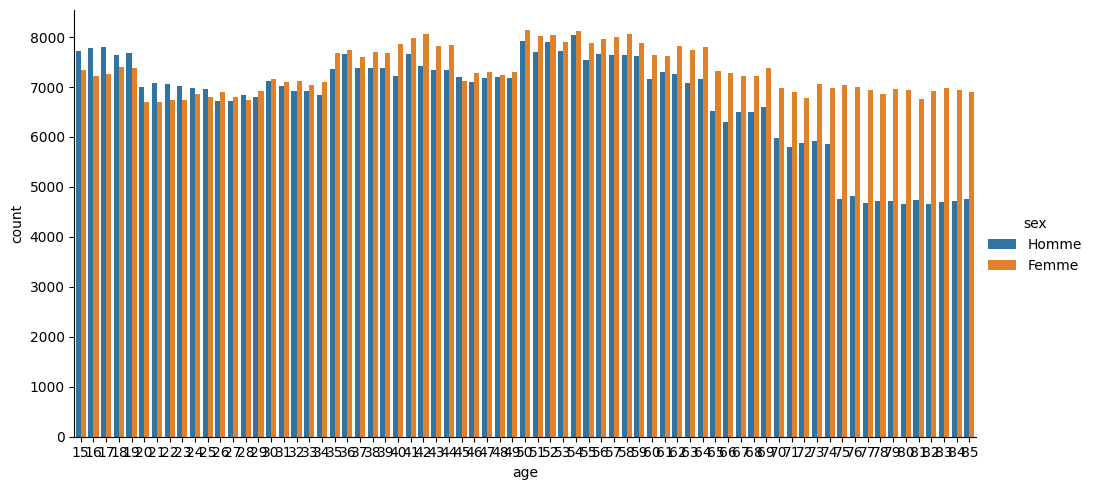

In [68]:
sns.catplot(
    data=simulated_population,
    x='age',
    hue='sex',
    kind='count',
    height=5,
    aspect=2
)

In [59]:
simulated_population = simulated_population[['age', 'sex', 'age_group']]

KeyError: "['age_group'] not in index"